# Theortical

What is the Intersection over Union (IoU) metric, and why is it important in object detection?

- IOU or Intersection over Union is one of the key metric used in  computer vision to assess the performance and accuracy of object detection algorithms.
- It is the  ratio of the area of intersection to the area of the union between the predicted and ground truth bounding boxes.
- Here, Area of Intersection is the common area between two bounding boxes (Overlap) whereas Area of Union is total area covered by the two bounding boxes.
- It gives value between 0 and 1, where 0 indicates no overlap, and 1 indicates a perfect overlap between the predicted box and ground truth bounding boxes.

What is Mean Average Precision (mAP) in the context of object detection, and how is it calculated?

- MAP or Mean average Precision is one of the key metric used in  computer vision to assess the performance and accuracy of object detection algorithms.
- It is the average of AP over all detected classes in the object detection models.
- It uses Precision and recall to calculate the AP or Average Precion of each class i.e area under precion recall curve.
- Precision is given by TP/TP +FP and recall is given by TP/TP+FN. For a single class we calculate cumulative TP  and FP  for each prediction of the class and calculate precicion and recall from above formula to AP and then after getting AP of each class. We take sum average of AP ofeach class to get MAP.


How does the Region Proposal Network (RPN) in Faster RCNN improve the efficiency of the detection process?

- Fast RCNN took 2 secs which was still not close to realtime. Faster RCNN solved this issue by remvoing selective search and bring Regional Proposal network which was comparitively faster.
- Here RPN  uses only feature inputs made by vgg netwrok rather than image input as compared to selective search.
- RPN had 3x3 convulution layers with 512 filters and 1 padding it then provides 1x1 conv  classifier which gave 2 outputs helping in task of  classifying whether this was background or not  and 1x1conv regressor which gave 4 outputs (delta-x, delta-y, delta-h, delta-w) helping in task of how much centre must be changed .

Explain the main differences between RCNN, Fast RCNN, and Faster RCNN.

- RCNN, Fast RCNN, and Faster RCNN are  object detection algorithms used in computer vision.
- RCNN  uses a selective search algorithm to propose regions of interest in an image and then uses a CNN to classify each ROI.
- Fast RCNN  greatly reduces the computational time needed for object detection.It improved RCNN by using a shared  CNN to process the entire image and all ROIs  rather than processing each ROI independently.
- Faster RCNN  was even more faster than Fast RCNN as it changed selective search algorithm used in RCNN and Fast RCNN  by using a region proposal network to generate ROIs which is much faster and uses the feature maps of the CNN to predict object bounds.


In the context of object detection, what are the advantages and disadvantages of using single-stage detectors like YOLO compared to two-stage detectors like Faster RCNN?

- YOLO (You Only Look Once) is a object detection algorithm  known for its speed and accuracy
- Faster RCNN is a single stage detectors and YOLO is one shot detector.
- Two stage detectors like faster RCNN  uses two passes of the input image to make predictions about the presence and location of objects. First is used to generate a set of proposals or object locations and the second pass is used to refine these proposals and make final predictions. This approach is more accurate than single-shot object detectors and  more computationally expensive.
- One stage detectors like YOLO uses a single pass of the input image to make predictions about the presence and location of objects in the image. It is computationally efficient.
- One shot detectors are used in real-time where accuracy is the trade off in sum such application where are two phase detectors provide more accurate results.

# Practical



"""
### Question:


#### Image Classification using the Celebrity Faces Dataset

You are tasked with designing an image classification architecture and using it to classify images from the Celebrity Faces Dataset, which consists of images belonging to 17 different celebrity classes. Follow the steps below to complete this task:

1. **Design an Image Classification Architecture**:
    - Create a convolutional neural network (CNN) architecture for image classification. The architecture should include:
        - Input layer suitable for the image size of the Celebrity Faces Dataset (images are generally around 474 pixels in one dimension).
        - Convolutional layers, pooling layers, and fully connected layers. Customize the number, type, and order of layers as you see fit.
        - Use suitable activation functions throughout the network.
        - Implement dropout or any other regularization techniques as needed.

2. **Compile the Model**:
    - Select an appropriate loss function and optimizer for multi-class classification.
    - Compile the model using your chosen parameters.

3. **Prepare and Split the Dataset**:
    - Load and preprocess the Celebrity Faces Dataset. Ensure to handle data augmentation if necessary.
    - Resize each image to a uniform size suitable for your model's input layer (e.g., resize images to 224x224 pixels).
    - Split the dataset into training and validation sets.

4. **Train the Model**:
    - Train the model using the training set of the Celebrity Faces Dataset.
    - Monitor the training process and adjust hyperparameters as needed.
    - Validate the model using the validation set.

5. **Evaluate the Model**:
    - Evaluate the performance of your model on the validation set.
    - Provide metrics such as accuracy, precision, recall, and F1-score.

6. **Classify New Images**:
    - During the exam, you will be provided with new images from the Celebrity Faces Dataset. Use your trained model to classify these images.
    - Report the predicted labels for the new images and discuss any challenges faced.

7. **Documentation and Analysis**:
    - Document your entire process, including:
        - Architecture design decisions.
        - Hyperparameter choices.
        - Training and evaluation procedures.
        - Results and analysis of the model's performance.

#### Notes:
- Utilize Python and a deep learning framework of your choice (e.g., TensorFlow, Keras) for implementing the CNN.
- The images in the Celebrity Faces Dataset should be resized to 224x224 pixels for consistency in input size.
- Ensure your code is well-structured and easy to follow, with clear comments where necessary.



Good luck with your preparation!
"""


In [ ]:
#Code for Loading the image
# Code for loading the dataset and plotting, with folder name

# first upload the dataset in google drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = 'path of your dataset'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Sample code for solving
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Function to create the CNN architecture
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 20

# Load and preprocess the dataset (example)
# Replace with actual loading and preprocessing steps
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Example input shape (to be adjusted based on dataset)
input_shape = train_images.shape[1:]
num_classes = len(set(train_labels.flatten()))

# Create the model
model = create_model(input_shape, num_classes)
model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


**You can utilize any code, including our existing code, to enhance your project.**

**All the best**

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!unzip "/content/gdrive/MyDrive/Test_Files/Celebrity Faces Dataset.zip" -d "/content/data"

Archive:  /content/gdrive/MyDrive/Test_Files/Celebrity Faces Dataset.zip
   creating: /content/data/Celebrity Faces Dataset/
   creating: /content/data/Celebrity Faces Dataset/Angelina Jolie/
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/002_8f8da10e.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/003_57612506.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/004_f61e7d0c.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/005_582c121a.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/006_9135205d.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/007_cabbfcbb.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/008_d1f87068.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/009_fb3e6174.jpg  
  inflating: /content/data/Celebrity Faces 

Loaded images shape: (3400, 224, 224, 3)
Loaded labels shape: /n Images with Folder name (3400,) /n Images with Folder name


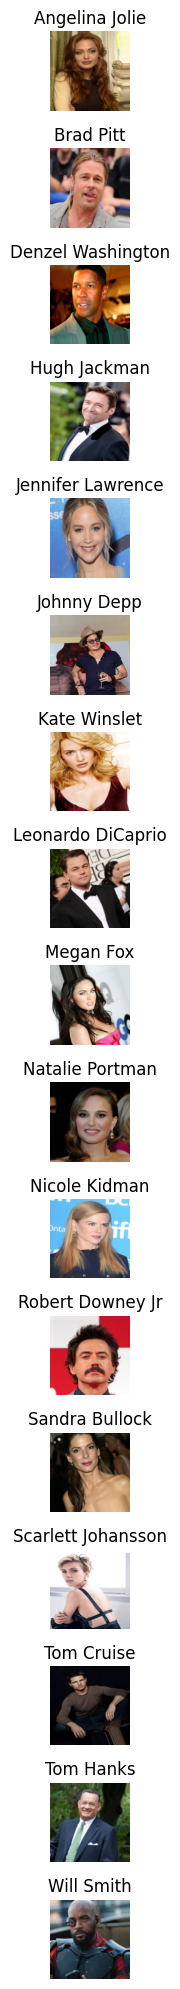

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Set up the directory path where your dataset is located
dataset_directory = '/content/data/Celebrity Faces Dataset'
target_count = 200  # Target number of images per class after augmentation

# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

images = []
labels = []
class_names = sorted(os.listdir(dataset_directory))  # Assumes each subdirectory is a class

for i, class_name in enumerate(class_names):
    class_directory = os.path.join(dataset_directory, class_name)
    file_list = os.listdir(class_directory)
    num_images = len(file_list)

    # Determine augmentation factor for this class
    if num_images < target_count:
        # Calculate how many images are needed to reach the target
        images_needed = target_count - num_images
        images_generated = 0

        while images_generated < images_needed:
            # Randomly select an image to augment
            filename = random.choice(file_list)
            image_path = os.path.join(class_directory, filename)
            img = Image.open(image_path)
            img = img.resize((224, 224))  # Resize if necessary

            # Convert to numpy array and expand dimensions to (1, height, width, channels)
            x = np.array(img)
            x = np.expand_dims(x, axis=0)

            # Generate augmented images
            augment_iter = datagen.flow(x, batch_size=1)

            for batch in augment_iter:
                augmented_image = batch[0]
                images.append(augmented_image)
                labels.append(i)  # Store index of the class
                images_generated += 1
                break

    # Load existing images in the class
    for filename in file_list:
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(class_directory, filename)
            img = Image.open(image_path)
            img = img.resize((224, 224))
            images.append(np.array(img))
            labels.append(i)

images = np.array(images) / 255.0
labels = np.array(labels)


print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")


num_classes = len(class_names)
fig, axes = plt.subplots( num_classes,1, figsize=(20, 20))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
d = pd.Series(labels)
d.value_counts()

0     200
1     200
2     200
3     200
4     200
5     200
6     200
7     200
8     200
9     200
10    200
11    200
12    200
13    200
14    200
15    200
16    200
Name: count, dtype: int64

In [6]:
images.shape

(3400, 224, 224, 3)

In [7]:
labels.shape

(3400,)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(images,labels , random_state=100, test_size=0.15,stratify=labels , shuffle=True)

In [4]:
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')

num_classes = 17


y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [5]:
#Creating VGG16 architecture
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout,BatchNormalization
from keras import utils

In [18]:
del model

In [7]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=17, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                        

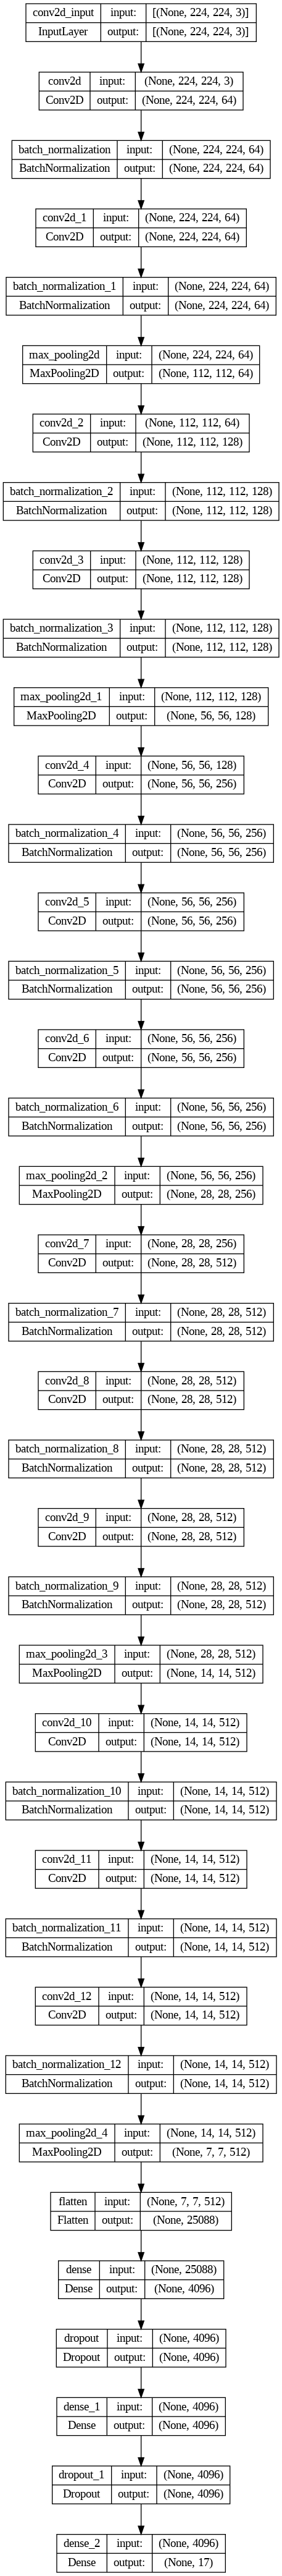

In [9]:
utils.plot_model(model, show_shapes=True)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, y_test))

Epoch 1/15
91/91 [==============================] - 97s 728ms/step - loss: 20.4594 - accuracy: 0.0747 - val_loss: 8.9007 - val_accuracy: 0.0804
Epoch 2/15
91/91 [==============================] - 48s 528ms/step - loss: 2.9610 - accuracy: 0.1118 - val_loss: 3.0250 - val_accuracy: 0.0706
Epoch 3/15
91/91 [==============================] - 48s 532ms/step - loss: 2.8180 - accuracy: 0.1381 - val_loss: 3.7392 - val_accuracy: 0.0725
Epoch 4/15
91/91 [==============================] - 48s 533ms/step - loss: 2.7207 - accuracy: 0.1543 - val_loss: 3.1373 - val_accuracy: 0.1000
Epoch 5/15
91/91 [==============================] - 48s 530ms/step - loss: 2.6484 - accuracy: 0.1630 - val_loss: 2.8164 - val_accuracy: 0.1078
Epoch 6/15
91/91 [==============================] - 48s 533ms/step - loss: 2.6076 - accuracy: 0.1713 - val_loss: 2.6618 - val_accuracy: 0.1608
Epoch 7/15
91/91 [==============================] - 49s 533ms/step - loss: 2.5793 - accuracy: 0.1689 - val_loss: 2.4024 - val_accuracy: 0.203

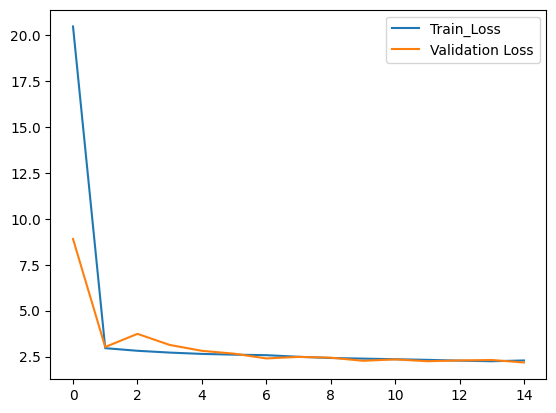

In [12]:
plt.plot(model.history.history['loss'],label='Train_Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()